In [1]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install -q keras

In [4]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import keras
from keras.layers import LeakyReLU
import splitfolders
from keras.layers import*
from keras.models import*
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [6]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random


In [7]:


path = '/content/drive/MyDrive/datasets'
#splitfolders.ratio(path,output="/content/drive/MyDrive/datacr",seed=58, ratio=(.8,.1, .1), group_prefix=None, move=False)



train=ImageDataGenerator(rescale=1/255)
valdata=ImageDataGenerator(rescale=1/255)
train_dataset=train.flow_from_directory('/content/drive/MyDrive/datacr/train',target_size=(128,128), batch_size=64,class_mode='categorical')
val_dataset = valdata.flow_from_directory('/content/drive/MyDrive/datacr/val', target_size=(128,128), batch_size=32,class_mode='categorical')



Found 16529 images belonging to 19 classes.
Found 2061 images belonging to 19 classes.


# New Section

In [8]:
from keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (128, 128, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')
for layer in base_model.layers:
    layer.trainable = False
last_layer = base_model.get_layer('block5_pool')
last_output = last_layer.output
x = Flatten()(last_output) 
x = Dense(units = 256, activation ='relu')(x) 
x = Dense(units = 19, activation ='softmax')(x)


58900480/58889256 [==============================] - 0s 0us/step


In [9]:
model = tf.keras.Model(base_model.input, x)
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
print(base_model.input.shape)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=6)
checkpoint_filepath = '/tmp/checkpoint'
cp = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

(None, 128, 128, 3)


In [10]:
model.summary()
checkpoint_filepath = '/tmp/checkpoint'
cp = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_recall',
    mode='max',
    save_best_only=True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

Epoch 1/20
259/259 [==============================] - 7581s 29s/step - loss: 0.6113 - accuracy: 0.7775 - recall: 0.7282 - precision: 0.8269 - val_loss: 0.3992 - val_accuracy: 0.8345 - val_recall: 0.8020 - val_precision: 0.8645
Epoch 2/20
259/259 [==============================] - 219s 845ms/step - loss: 0.3067 - accuracy: 0.8808 - recall: 0.8599 - precision: 0.9007 - val_loss: 0.3888 - val_accuracy: 0.8530 - val_recall: 0.8302 - val_precision: 0.8752
Epoch 3/20
259/259 [==============================] - 205s 794ms/step - loss: 0.2537 - accuracy: 0.9003 - recall: 0.8854 - precision: 0.9151 - val_loss: 0.3361 - val_accuracy: 0.8540 - val_recall: 0.8418 - val_precision: 0.8749
Epoch 4/20
259/259 [==============================] - 206s 794ms/step - loss: 0.1990 - accuracy: 0.9243 - recall: 0.9122 - precision: 0.9343 - val_loss: 0.3716 - val_accuracy: 0.8680 - val_recall: 0.8549 - val_precision: 0.8797
Epoch 5/20
259/259 [==============================] - 205s 793ms/step - loss: 0.1617 - ac

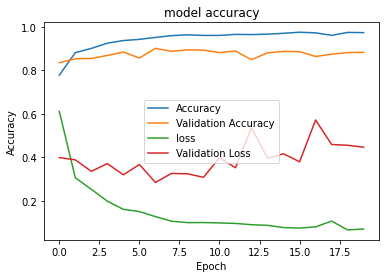

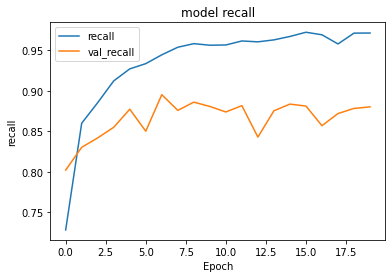

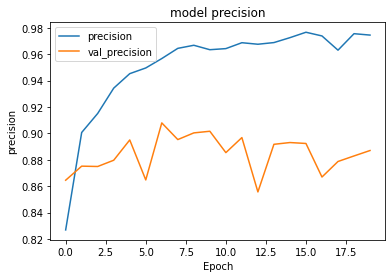

In [11]:
  
hist = model.fit(train_dataset, validation_data= val_dataset,epochs=20,callbacks=[cp])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

plt.plot(hist.history['recall'])
plt.plot(hist.history['val_recall'])
plt.title("model recall")
plt.ylabel("recall")
plt.xlabel("Epoch")
plt.legend(["recall","val_recall"])
plt.show()


plt.plot(hist.history['precision'])
plt.plot(hist.history['val_precision'])
plt.title("model precision")
plt.ylabel("precision")
plt.xlabel("Epoch")
plt.legend(["precision","val_precision"])
plt.show()


In [ ]:
print("Done")

In [12]:
model.save('/content/drive/MyDrive/model/VGG16_new')

In [13]:
test=ImageDataGenerator(rescale=1/255)

test_dataset=train.flow_from_directory('/content/drive/MyDrive/datacr/test',target_size=(128,128), batch_size=32,class_mode='categorical')

result = model.evaluate(test_dataset,batch_size=32)

Found 2081 images belonging to 19 classes.
66/66 [==============================] - 662s 10s/step - loss: 0.3720 - accuracy: 0.8794 - recall: 0.8775 - precision: 0.8838


In [ ]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
import tensorflow as tf
from tensorflow import keras
import keras.layers as layers

In [ ]:
import torchvision.models as models
alexnet_model = models.alexnet(pretrained=True)

alexnet_model.eval()


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
from keras.applications.vgg19 import VGG19

base_model = VGG19(input_shape = (128, 128, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')
for layer in base_model.layers:
    layer.trainable = False
last_layer = base_model.get_layer('block5_pool')
last_output = last_layer.output
x = Flatten()(last_output) 
x = Dense(units = 256, activation ='relu')(x) 
x = Dense(units = 19, activation ='softmax')(x)




In [ ]:
model = tf.keras.Model(base_model.input, x)
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
print(base_model.input.shape)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=6)
checkpoint_filepath = '/tmp/checkpoint'
cp = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

(None, 224, 224, 3)


In [ ]:
model.summary()
checkpoint_filepath = '/tmp/checkpoint'
cp = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_recall',
    mode='max',
    save_best_only=True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Epoch 1/20
163/163 [==============================] - 3787s 23s/step - loss: 0.6804 - accuracy: 0.7612 - recall: 0.6512 - precision: 0.8559 - val_loss: 0.4177 - val_accuracy: 0.8459 - val_recall: 0.7851 - val_precision: 0.8954
Epoch 2/20
163/163 [==============================] - 209s 1s/step - loss: 0.3372 - accuracy: 0.8683 - recall: 0.8306 - precision: 0.9003 - val_loss: 0.3719 - val_accuracy: 0.8482 - val_recall: 0.8097 - val_precision: 0.8729
Epoch 3/20
163/163 [==============================] - 204s 1s/step - loss: 0.2717 - accuracy: 0.8973 - recall: 0.8728 - precision: 0.9212 - val_loss: 0.3274 - val_accuracy: 0.8636 - val_recall: 0.8390 - val_precision: 0.8890
Epoch 4/20
163/163 [==============================] - 204s 1s/step - loss: 0.2421 - accuracy: 0.9081 - recall: 0.8874 - precision: 0.9264 - val_loss: 0.3049 - val_accuracy: 0.8744 - val_recall: 0.8582 - val_precision: 0.8919
Epoch 5/20
163/163 [==============================] - 203s 1s/step - loss: 0.2045 - accuracy: 0.92

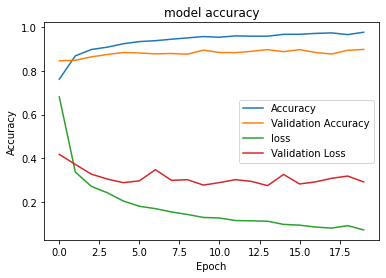

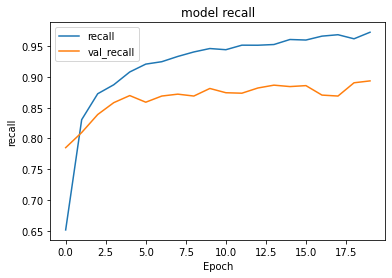

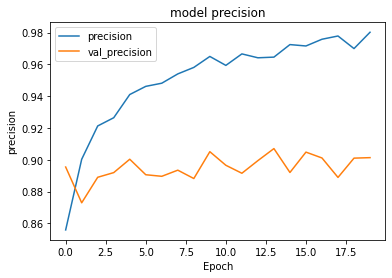

In [ ]:
hist = model.fit(train_dataset, validation_data= val_dataset,epochs=20,callbacks=[cp])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

plt.plot(hist.history['recall'])
plt.plot(hist.history['val_recall'])
plt.title("model recall")
plt.ylabel("recall")
plt.xlabel("Epoch")
plt.legend(["recall","val_recall"])
plt.show()


plt.plot(hist.history['precision'])
plt.plot(hist.history['val_precision'])
plt.title("model precision")
plt.ylabel("precision")
plt.xlabel("Epoch")
plt.legend(["precision","val_precision"])
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/model/VGG19')

In [ ]:
test=ImageDataGenerator(rescale=1/255)

test_dataset=train.flow_from_directory('/content/drive/MyDrive/datacr/test',target_size=(128,128), batch_size=32,class_mode='categorical')

result = model.evaluate(test_dataset,batch_size=32)

Found 1312 images belonging to 14 classes.
21/21 [==============================] - 403s 20s/step - loss: 0.5413 - accuracy: 0.8018 - recall: 0.7927 - precision: 0.8125
